## 로지스틱 회귀(Logistic Regression)

* 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘입니다. 즉, 로지스틱 회귀는 분류에 사용됩니다.
* 로지스틱 회귀가 선형 회귀와 다른 점은 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid)함수 최적선을 찾고 이 시기모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정한다는 것입니다.

### 로지스틱 회귀 예측

* 로지스틱 회귀는 주로 이진 분류(0과 1)에 사용됩니다.(다중 클래스 분류에도 적용가능) 로지스틱 회귀에서 예측 값은 예측 확률을 의미하며, 예측 값 즉 예측 확률이 0.5이상이면 1로, 0.5이하이면 0으로 예측합니다. 로지스틱 회귀의 예측 확률은 시그모이드 함수의 출력값으로 계산됩니다.

* 시그모이드 함수 $ y = \frac{1}{1+e^-x} $

* 단순 선형 회귀 : y = w1x + w0가 있다고 할 때
    * 로지스틱 회귀는 0과 1을 예측하기에 단순 회귀식은 의미가 없습니다.
    * 하지만 Odds(성공확률/실패확률)을 통해 선형 회귀식에 확률을 적용할 수 있습니다.
        * Odds = p/(1-p)
    * 하지만 확률p의 범위가 (0,1)이므로 선형 회귀의 반환값인 (-무한대, +무한대)에 대응하기 위하여 로그 변환을 수행하고 이에 대한 선형 회귀를 적용합니다.
        * Log(Odds(p)) = w1x + w0
    * 해당 식을 데이터 x의 확률 p로 정리하면 아래와 같습니다.
        * $ p(x) = \frac{1}{1+e^-(w1x+w0)} $
* **로지스틱 회귀는 학습을 통해 시그모이드 함수의 w를 최적화하여 예측하는 것입니다.**

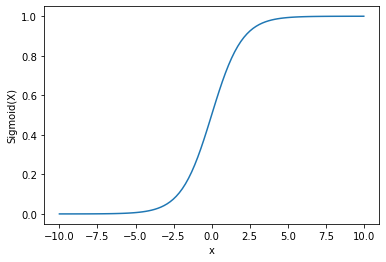

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
  
plt.show()

# +무한대로 가면 1에 수렴, -무한대로 가도 0에 수렴
# 0.5보다 크면 1로 간주, 0.5보다 작으면 0으로 간주

### 로지스틱 회귀 특징과 사이킷런 로지스틱 회귀 클래스

* 로지스틱 회귀는 가볍고 빠르지만, 이진 분류 예측 성능도 뛰어납니다. 이 때문에 로지스틱 회귀를 이진 분류의 기본 모델로 사용하는 경우가 많습니다. 또한 로지스틱 회귀는 희소한 데이터 세트 분류에도 뛰어난 성능을 보여서 텍스트 분류에서도 자주 사용됩니다.
* 사이킷런은 LogisticRegression 클래스로 로지스틱 회귀를 구현합니다. 주요 하이퍼 파라미터로 penalty와 C가 있습니다. Penalty는 규제(Regularization)의 유형을 설정하여 'l2'로 설정시 L2 규제를, 'l1'으로 설정 시 L1 규제를 뜻합니다. C는 규제 강도를 조절하는 alpha값의 역수입니다. 즉 C = 1/alpha입니다. C값이 작을 수록 규제 강도가 큽니다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler()로 평균이 0, 분산이 1인 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {0:.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [8]:
from sklearn.model_selection import GridSearchCV

params = {
            'penalty':['l2', 'l1'],
            'C':[0.01, 0.1, 1, 5, 10]
         }
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'}, 최적 평균 정확도:0.975


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_valida

---

## 회귀 트리(Regression Tree)

* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능합니다.
* 이는 트리가 CART(Classification and Regression Tree)를 기반으로 만들어졌기 때문입니다. CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘입니다.
* CART 회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS(SSE)가 최소가 될 수 있는 기준을 찾아서 분할 됩니다.
* 최종 분할이 완료된 후에 각 분할 영역에 있는 데이터 결정값들의 평균 값으로 학습 예측합니다.

### 회귀 트리 프로세스

1. RSS를 최소화 하는 규칙 기준에 따라 분할
2. 최종 분할된 영역에 있는 데이터들의 평균값들로 학습/예측


### 사이킷런의 회귀 트리 지원

|알고리즘|회귀 Estimator 클래스|분류 Estimator 클래스|
|:------:|:---:|:---:|
|Decision Tree|DecisionTreeRegressor|DecisionTreeClassifier|
|Gradient Boosting|GradientBoostingRegressor|GradientBoostingClassifier|
|XGBoost|XGBRegressor|XGBClassifier|
|LightGBM|LGBMRegressor|LGBMClassifier|

### 회귀 트리의 오버 피팅

* 회귀 트리도 복잡한 트리 구조를 가질 경우 오버 피팅하기 쉬우므로 트리의 크기와 노드 개수의 제한등의 방법을 통해 오버 피팅을 개선할 수 있습니다.

In [12]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 보스턴 데이터 세트 로드
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MES scores : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores :', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 교차 검증의 개별 Negative MES scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


In [17]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

#### 사이킷런의 여러 회귀 트리 클래스를 이용하여 회귀 예측

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
5 교차 검증의 평균 RMSE : 5.978
#####  RandomForestRegressor  #####
5 교차 검증의 평균 RMSE : 4.423
#####  GradientBoostingRegressor  #####
5 교차 검증의 평균 RMSE : 4.269
#####  XGBRegressor  #####
5 교차 검증의 평균 RMSE : 4.251
#####  LGBMRegressor  #####
5 교차 검증의 평균 RMSE : 4.646


#### 회귀 트리는 선형 회귀의 회귀 계수 대신, 피처 중요도로 피처의 상대적 중요도를 알 수 있습니다.

<AxesSubplot:>

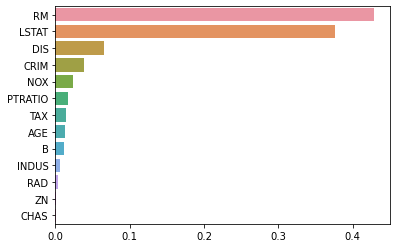

In [19]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

#### 오버피팅을 시각화하기 위해 한개의 피처 RM과 타겟값 PRICE 기반으로 회귀 예측 수행

(100, 2)


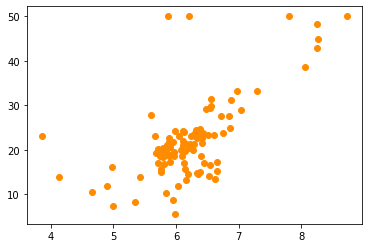

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = bostonDF[['RM', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0) # dataFrame에서 100개 샘플링
print(bostonDF_sample.shape)

plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c='darkorange')

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM, 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1, 1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

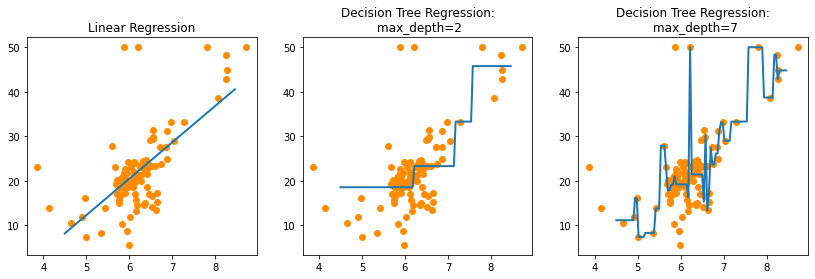

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하여 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression:\n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label='max_depth:2', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression:\n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)